In [123]:
# ! git pull
''error fatal: refusing to merge unrelated histories'''
''' solution 

step1) ! git pull origin master --allow-unrelated-histories
step2) 수정한 파일 commit'''

fatal: refusing to merge unrelated histories


In [130]:
# ! git push --set-upstream origin master

Branch 'master' set up to track remote branch 'master' from 'origin'.


To https://github.com/ChiHoonOH/pytorch_study.git
   5337ac1..52c0e62  master -> master


In [ ]:
# ! pip install statsmodels

# arima와 LSTM ENSEMBLE
## 현재는 데이터가 없으나 차후에 선형과 비선형이 섞인 데이터에 대해서 적용 해볼 수 있다고 판단하여 코드 작성

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA



# 데이터 생성: Sine 함수 + 랜덤 노이즈
# np.random.seed(0)
# time_steps = 200
# t = np.arange(time_steps)
# data_values = np.sin(0.1 * t) + 0.5 * np.random.normal(size=time_steps)  # Sine 함수 + 랜덤 노이즈
# data = pd.DataFrame(data_values, columns=['value'])




# 데이터 생성: 선형적인 추세와 계절성 + 비선형 노이즈
time_steps = 200
t = np.arange(time_steps)
linear_trend = 0.05 * t                       # 선형 추세
seasonal_pattern = np.sin(0.2 * t)            # 계절성 패턴 (사인 함수)
noise = 0.5 * np.random.normal(size=time_steps) # 비선형 노이즈

# 시계열 데이터 = 선형 + 계절성 + 비선형 노이즈
data_values = linear_trend + seasonal_pattern + noise
data = pd.DataFrame(data_values, columns=['value'])

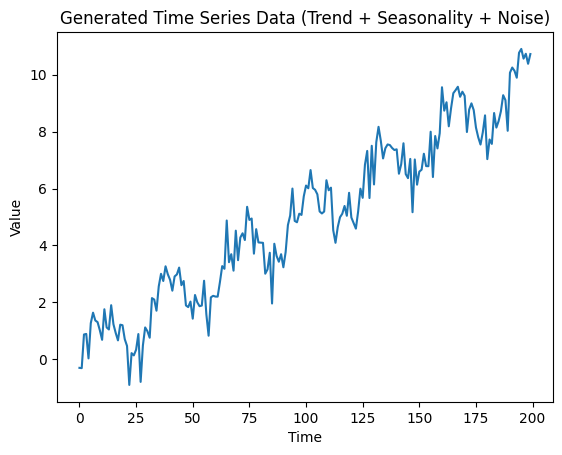

In [82]:
# 생성된 데이터 시각화
plt.plot(data['value'])
plt.title("Generated Time Series Data (Trend + Seasonality + Noise)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [ ]:
time_series = data['value'].values  # 예측할 컬럼 선택
time_series = time_series.reshape(-1, 1)

In [57]:
# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
time_series_scaled = scaler.fit_transform(time_series)

# 1. ARIMA 모델로 선형 요소 예측
arima_model = ARIMA(time_series_scaled, order=(5, 1, 0)) 
arima_result = arima_model.fit()
arima_forecast = arima_result.predict(start=0, end=len(time_series_scaled)-1, dynamic=False)

# ARIMA의 예측 오차(잔차) 계산
residuals = time_series_scaled - arima_forecast.reshape(-1, 1)

C:\Users\pkrng\Desktop\재취업준비\공부\torch_test\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [83]:
?ARIMA

Init signature:
ARIMA(
    endog,
    exog=None,
    order=(0, 0, 0),
    seasonal_order=(0, 0, 0, 0),
    trend=None,
    enforce_stationarity=True,
    enforce_invertibility=True,
    concentrate_scale=False,
    trend_offset=1,
    dates=None,
    freq=None,
    missing='none',
    validate_specification=True,
)
Docstring:     
Autoregressive Integrated Moving Average (ARIMA) model, and extensions

This model is the basic interface for ARIMA-type models, including those
with exogenous regressors and those with seasonal components. The most
general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
all specialized cases, including

- autoregressive models: AR(p)
- moving average models: MA(q)
- mixed autoregressive moving average models: ARMA(p, q)
- integration models: ARIMA(p, d, q)
- seasonal models: SARIMA(P, D, Q, s)
- regression with errors that follow one of the above ARIMA-type models

Parameters
----------
endog : array_like, optional
    The observed time-se

In [58]:
x = list(range(0,len(time_series_scaled)))

In [59]:
arima_forecast_inverse = scaler.inverse_transform(arima_forecast.reshape(-1,1))

In [60]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Values')

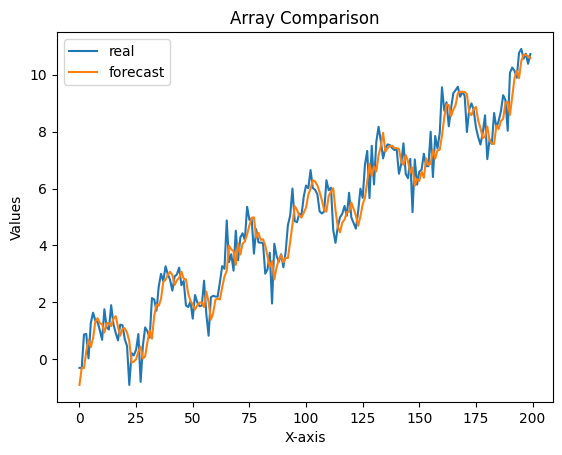

In [61]:
# 플롯 그리기
plt.plot(x, time_series, label="real")  # 첫 번째 배열
plt.plot(x, arima_forecast_inverse, label="forecast")  # 두 번째 배열

# 범례 추가
plt.legend()

# 그래프 제목 및 축 레이블 설정
plt.title("Array Comparison")
plt.xlabel("X-axis")
plt.ylabel("Values")

In [62]:
# 2. LSTM 모델을 사용하여 비선형 예측
# LSTM을 위한 데이터셋 생성 함수
def create_lstm_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):#이 숫자를 여전히 미지수로 두고 생각했기 때문에..
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X_residuals, Y_residuals = create_lstm_dataset(residuals, time_step)

In [84]:
residuals

array([[ 0.05080161],
       [-0.00084324],
       [ 0.09978288],
       [ 0.05273467],
       [-0.05533464],
       [ 0.07157677],
       [ 0.07625318],
       [ 0.00338337],
       [-0.01168743],
       [-0.02100449],
       [-0.04674173],
       [ 0.0692372 ],
       [-0.0125539 ],
       [-0.01906158],
       [ 0.06223211],
       [-0.01676887],
       [-0.04978391],
       [-0.04044768],
       [ 0.03307073],
       [ 0.01062003],
       [-0.03263605],
       [-0.03974137],
       [-0.13011807],
       [ 0.02842381],
       [ 0.01837481],
       [ 0.02843635],
       [ 0.05242712],
       [-0.10494453],
       [ 0.03895566],
       [ 0.08602605],
       [ 0.0323285 ],
       [-0.02182423],
       [ 0.12089301],
       [ 0.04792766],
       [-0.01870581],
       [ 0.05798783],
       [ 0.07459033],
       [ 0.00229477],
       [ 0.04024697],
       [ 0.00091531],
       [-0.02398452],
       [-0.04678971],
       [ 0.02574333],
       [ 0.01762723],
       [ 0.03064649],
       [-0

In [66]:
# PyTorch 텐서로 변환
X_residuals = torch.tensor(X_residuals, dtype=torch.float32).unsqueeze(-1)
Y_residuals = torch.tensor(Y_residuals, dtype=torch.float32)



# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        predictions = self.linear(lstm_out[:, -1])
        return predictions

model = LSTMModel()

# 손실 함수 및 옵티마이저 정의
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_residuals)
    loss = loss_function(y_pred.squeeze(), Y_residuals)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss: {loss.item()}')

# 3. LSTM을 사용한 비선형 예측 수행
model.eval()
with torch.no_grad():
    lstm_predictions = model(X_residuals).numpy()

# 4. 최종 예측: ARIMA 예측값과 LSTM 예측값을 결합
final_forecast = arima_forecast[time_step + 1:] + lstm_predictions.flatten()

# 결과 역정규화
final_forecast = scaler.inverse_transform(final_forecast.reshape(-1, 1))

# 예측 결과 출력
print(final_forecast)

Epoch 0 Loss: 0.003944167867302895
Epoch 10 Loss: 0.003147795097902417
Epoch 20 Loss: 0.0031477781012654305
Epoch 30 Loss: 0.0031483573839068413
Epoch 40 Loss: 0.003147600218653679
Epoch 50 Loss: 0.003145434195175767
Epoch 60 Loss: 0.003143325448036194
Epoch 70 Loss: 0.0031426060013473034
Epoch 80 Loss: 0.0031424839980900288
Epoch 90 Loss: 0.0031422146130353212
[[ 1.03876364]
 [ 1.37844648]
 [ 1.34795091]
 [ 1.25372898]
 [ 1.5253043 ]
 [ 1.58432814]
 [ 1.22932486]
 [ 0.93182407]
 [ 1.18196271]
 [ 1.17905543]
 [ 1.02196824]
 [ 0.73373926]
 [-0.01221666]
 [ 0.06163969]
 [ 0.1017643 ]
 [ 0.35471338]
 [ 0.52161414]
 [ 0.08822936]
 [ 0.21876391]
 [ 0.69106288]
 [ 1.07411384]
 [ 0.78883604]
 [ 1.62063253]
 [ 1.9768103 ]
 [ 1.93625746]
 [ 2.2068527 ]
 [ 2.79234458]
 [ 2.84958732]
 [ 3.05305333]
 [ 3.14611017]
 [ 3.04603785]
 [ 2.70368534]
 [ 2.88248921]
 [ 2.94998274]
 [ 3.16334071]
 [ 2.90355675]
 [ 2.90197403]
 [ 2.40582524]
 [ 2.1712529 ]
 [ 2.0357438 ]
 [ 1.84706105]
 [ 1.998605  ]
 [ 2.0

In [71]:
time_series[11:,].shape

(189, 1)

In [69]:
final_forecast.shape

(189, 1)

In [73]:
x = list(range(0,len(final_forecast)))

In [76]:
lstm_real = time_series[11:,]

Text(0, 0.5, 'Values')

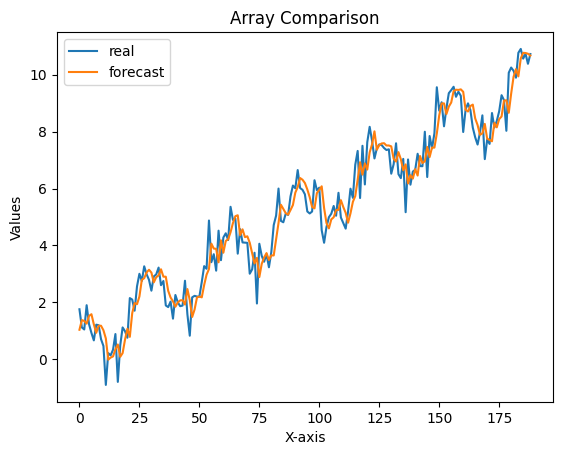

In [77]:
# 플롯 그리기
plt.plot(x, lstm_real, label="real")  # 첫 번째 배열
plt.plot(x, final_forecast, label="forecast")  # 두 번째 배열

# 범례 추가
plt.legend()

# 그래프 제목 및 축 레이블 설정
plt.title("Array Comparison")
plt.xlabel("X-axis")
plt.ylabel("Values")

In [ ]:
lstm_real 

In [78]:
sum(abs(lstm_real-final_forecast))

array([97.30165402])

In [79]:
# 이미 arima로 다 잡아서 LSTM이 별도로 필요하지는 않다.
sum(abs(arima_forecast_inverse[11:,]-final_forecast))

array([16.03095647])